<a href="https://colab.research.google.com/github/Ephraimosse9/Pytorch-course-on-UDEMY--Notes-and-Codes/blob/main/Comparison_between_using_First_principle_and_Pytorch_for_Linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Linear Regression from First Principle

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:


X = [1,2,3,4,5,6]
y = [4,6,8,10,12,14]

train_split = int(0.8*len(X))
X_train = X[:train_split]
Y_train = y[:train_split]
X_test = X[train_split:]
Y_test = y[train_split:]

X_test

[5, 6]

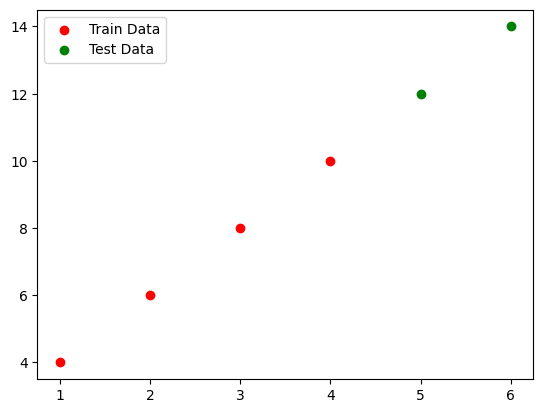

In [3]:
def plot_predictions(X_train=X_train,X_test=X_test, prediction=None):
  plt.scatter(X_train,Y_train, c='r', label = "Train Data")
  plt.scatter(X_test,Y_test, c='g', label = "Test Data")
  if prediction is not None:
    plt.scatter(X_test,prediction, c='b', label = "Predicted Data")

  plt.legend()
plot_predictions()

In [4]:
def train_model(X, y, lr, epochs):
  X = np.array(X)
  y = np.array(y)
  n = len(y)
  # m = (n*np.sum(X*y) - np.sum(X) * np.sum(y))/(n*np.sum(X**2) - np.sum(X)**2)
  # c = (np.sum(y) - m*np.sum(X))/n
  m=0,
  c=0


  print(f"Initial Value of m is {m} | Initial Value of c is {c}")
  for epoch in range(epochs):
    # print(f"This is m: {m}, This is c: {c}")
    y_pred = m*X + c
    error = y_pred - y
    if epoch %10 == 0:
      print(f"Mean absolute error: {sum(abs(error))/n}")
    dl_dm = (np.sum(np.dot(X, np.sign(error))))/n
    dl_dc = (np.sum(np.sign(error)))/n
    m-= lr*(dl_dm)
    c-= lr*(dl_dc)

  return m, c


In [5]:
m, c = train_model(X=X_train, y=Y_train, lr=0.01, epochs=100)


Initial Value of m is (0,) | Initial Value of c is 0
Mean absolute error: 7.0
Mean absolute error: 6.275
Mean absolute error: 5.549999999999999
Mean absolute error: 4.824999999999999
Mean absolute error: 4.099999999999999
Mean absolute error: 3.375000000000001
Mean absolute error: 2.650000000000003
Mean absolute error: 1.9250000000000054
Mean absolute error: 1.200000000000007
Mean absolute error: 0.47500000000000964


In [6]:
m,c

(array([2.32]), np.float64(0.9550000000000006))

In [7]:
y_eval = m*X_test + c
y_eval

array([12.555, 14.875])

In [8]:
Y_test

[12, 14]

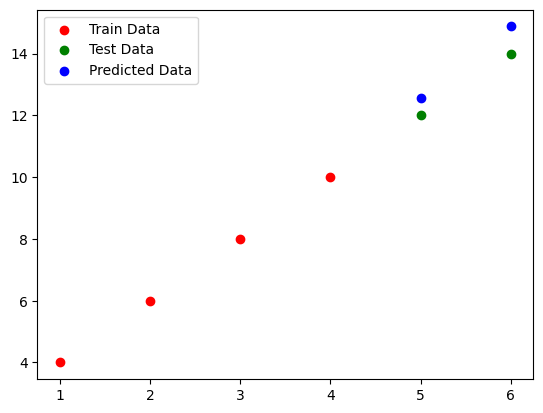

In [9]:
plot_predictions(prediction=y_eval)

#Using PyTorch

In [10]:
import torch
from torch import nn

In [11]:
class Linear(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Linear(in_features=1, out_features=1)

  def forward(self, x):
    # Corrected: Apply the linear transformation to the input x
    return self.weight(x)

In [12]:
model = Linear()


In [13]:
X_train_tensor = torch.tensor(X_train).type(torch.float32).unsqueeze(dim=1)
Y_train_tensor = torch.tensor(Y_train).type(torch.float32).unsqueeze(dim=1)

X_train_tensor.shape

torch.Size([4, 1])

In [14]:
# Convert pandas Series to NumPy arrays, then to PyTorch tensors
X_test_tensor = torch.tensor(X_test).type(torch.float32).unsqueeze(dim=1)
Y_test_tensor = torch.tensor(Y_test).type(torch.float32).unsqueeze(dim=1)



In [15]:
loss_fn = nn.L1Loss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.01)

In [16]:
epochs = 100
for epoch in range(epochs):
  model.train()
  # print(f"this is shape {X_train.shape}")

  y_pred = model(X_train_tensor)
  # print(f"this is shape {y_pred}")
  loss = loss_fn(y_pred, Y_train_tensor)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model.eval()
  with torch.inference_mode():
    y_pred_test = model(X_test_tensor)
    loss_test = loss_fn(y_pred_test, Y_test_tensor)

  print(f"Training Loss: {loss} | Testing Loss: {loss_test}")

Training Loss: 6.177022933959961 | Testing Loss: 10.404488563537598
Training Loss: 6.104522705078125 | Testing Loss: 10.256988525390625
Training Loss: 6.0320234298706055 | Testing Loss: 10.109488487243652
Training Loss: 5.9595232009887695 | Testing Loss: 9.96198844909668
Training Loss: 5.887022972106934 | Testing Loss: 9.814489364624023
Training Loss: 5.814523220062256 | Testing Loss: 9.66698932647705
Training Loss: 5.742023468017578 | Testing Loss: 9.519489288330078
Training Loss: 5.6695237159729 | Testing Loss: 9.371989250183105
Training Loss: 5.597023963928223 | Testing Loss: 9.224489212036133
Training Loss: 5.524523735046387 | Testing Loss: 9.076990127563477
Training Loss: 5.452023983001709 | Testing Loss: 8.929490089416504
Training Loss: 5.379523754119873 | Testing Loss: 8.781990051269531
Training Loss: 5.307024002075195 | Testing Loss: 8.634490013122559
Training Loss: 5.234523773193359 | Testing Loss: 8.486989974975586
Training Loss: 5.162024021148682 | Testing Loss: 8.3394908905

In [17]:
model.state_dict()

OrderedDict([('weight.weight', tensor([[2.5517]])),
             ('weight.bias', tensor([0.3438]))])

In [18]:
y_eval_pytorch = model(X_test_tensor)
y_eval_pytorch

tensor([[13.1022],
        [15.6539]], grad_fn=<AddmmBackward0>)

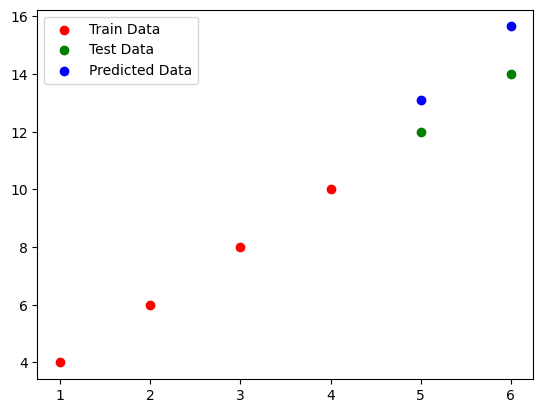

In [29]:
a=y_eval_pytorch.detach().numpy()
plot_predictions(prediction=a)

In [33]:
y_eval

array([12.555, 14.875])

In [35]:
a

array([[13.102187],
       [15.653868]], dtype=float32)

In [40]:
if a.all() > y_eval.all():
  print("Pytorch beat First Principle!!!!!")
else:
  print("First Principle beat Pytorch!!!!")

First Principle beat Pytorch!!!!
